Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64
Duplicates in Superstore dataset: 0
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0


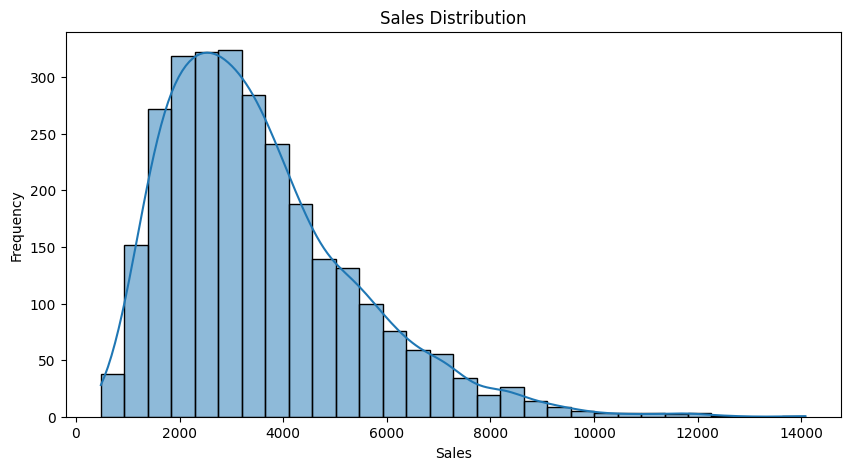

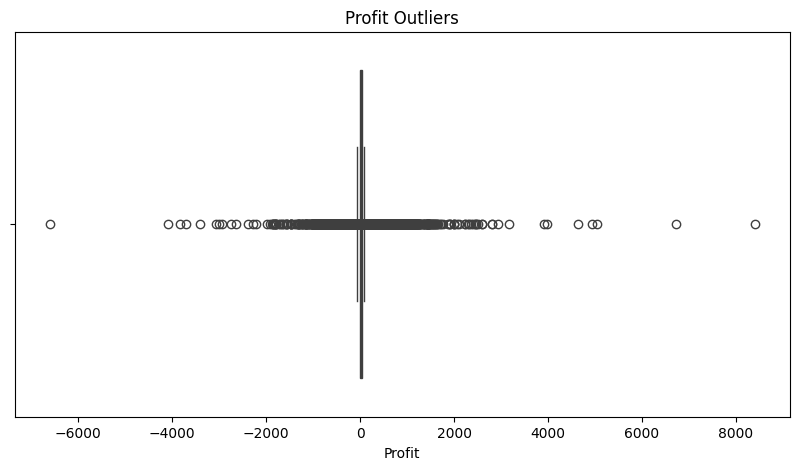

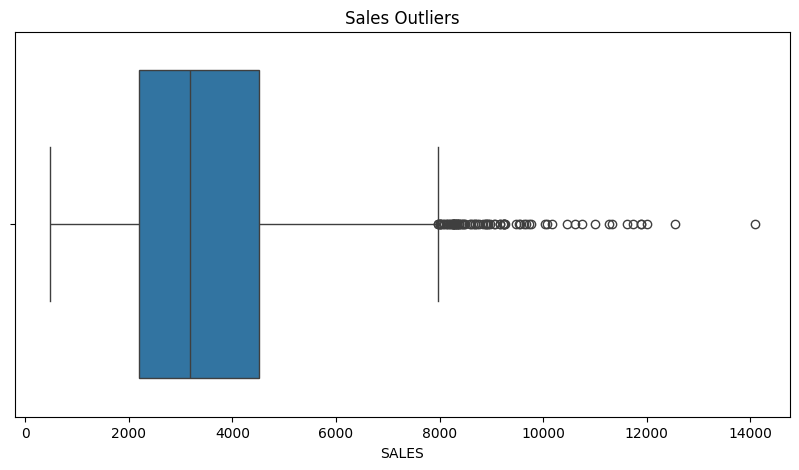

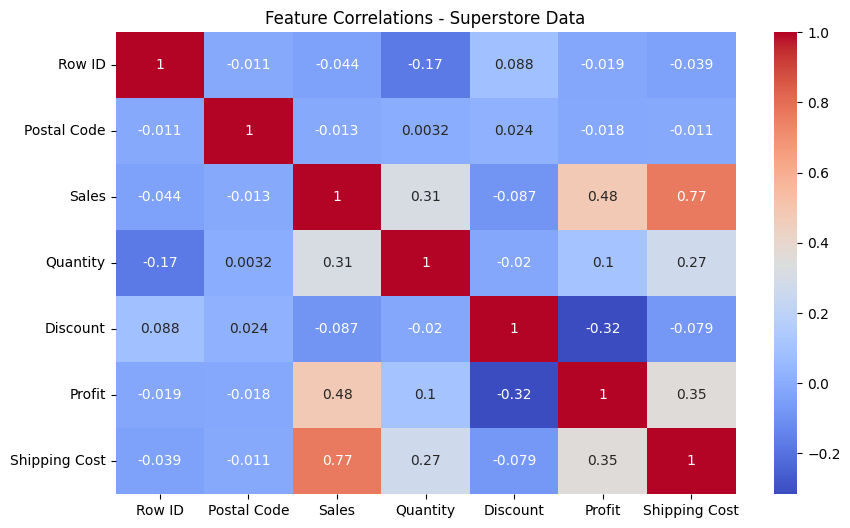

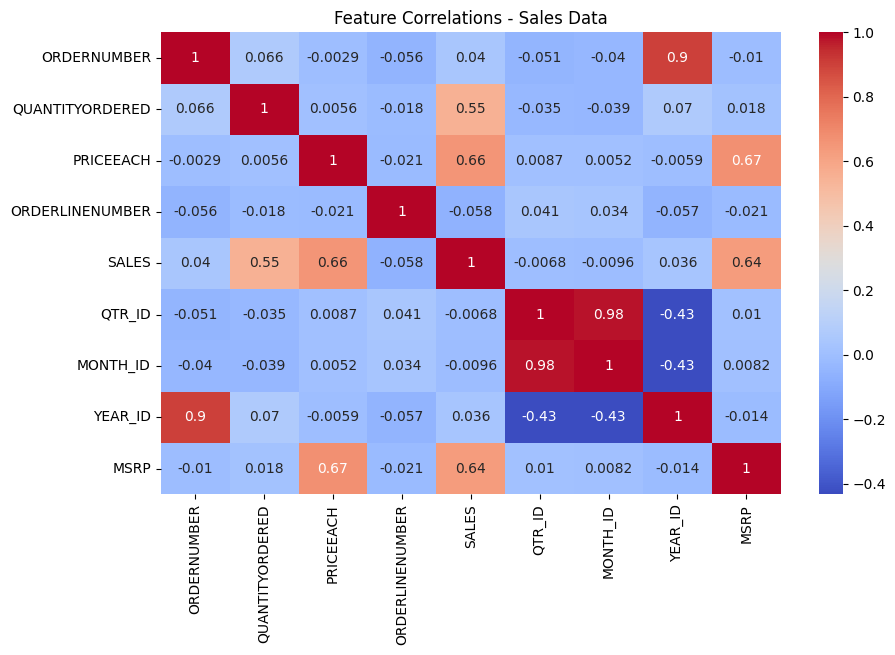

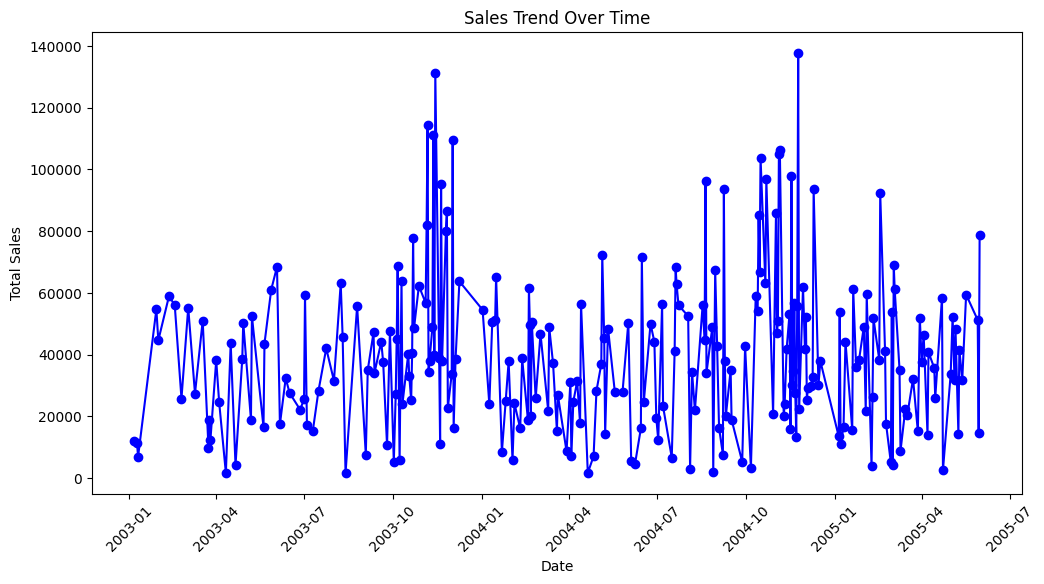

0
datetime64[ns]
float64
['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
Error: 'PROFIT' or 'DISCOUNT' column is missing!


In [40]:
import pandas as pd
from IPython import get_ipython
from IPython.display import display

df_superstore = pd.read_csv("superstore_dataset2011-2015.csv", encoding="ISO-8859-1")
df_sales = pd.read_csv("sales_data_sample.csv", encoding="ISO-8859-1")

# Check for missing values
print(df_superstore.isnull().sum())

# Check for duplicates
print("Duplicates in Superstore dataset:", df_superstore.duplicated().sum())

# Remove duplicates
df_superstore.drop_duplicates(inplace=True)

# Fill missing values (Example: Filling missing numerical values with the median)
df_superstore.fillna(df_superstore.median(numeric_only=True), inplace=True)


print(df_sales.isnull().sum())
print("Duplicates in Sales dataset:", df_sales.duplicated().sum())
df_sales.drop_duplicates(inplace=True)
df_sales.fillna(df_sales.median(numeric_only=True), inplace=True)

# Print the actual column names to identify the correct date column
print(df_sales.columns)

# Assuming the actual date column is 'ORDERDATE'
df_sales['ORDERDATE'] = pd.to_datetime(df_sales['ORDERDATE'], errors='coerce')  # Convert to datetime

# Now you can proceed with other operations
df_sales.info()
df_sales.columns = df_sales.columns.str.strip()
print(df_sales.columns.tolist())
for col in df_sales.columns:
    if "date" in col.lower():
        print(f"Possible Date Column: {col}")
print(df_sales.head())


df_superstore.describe()
df_sales.describe()


# Statistical summary of numerical columns
print(df_superstore.describe())
print(df_sales.describe())


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_sales["SALES"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x=df_superstore["Profit"])
plt.title("Profit Outliers")
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x=df_sales["SALES"])
plt.title("Sales Outliers")
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(df_superstore.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlations - Superstore Data")
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(df_sales.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlations - Sales Data")
plt.show()


sales_trend = df_sales.groupby("ORDERDATE")["SALES"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(sales_trend["ORDERDATE"], sales_trend["SALES"], marker="o", linestyle="-", color="blue")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

print(df_sales["ORDERDATE"].isnull().sum())  # Check missing dates
print(df_sales["ORDERDATE"].dtype)  # Check datatype

df_sales = df_sales.dropna(subset=["ORDERDATE"])  # Drop rows where ORDERDATE is NaT

print(df_sales["SALES"].dtype)  # Check column type

print(df_sales.columns.tolist())  # See available columns
df_sales.columns = df_sales.columns.str.strip()  # Remove extra spaces

if "PROFIT" not in df_sales.columns or "DISCOUNT" not in df_sales.columns:
    print("Error: 'PROFIT' or 'DISCOUNT' column is missing!")

